In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

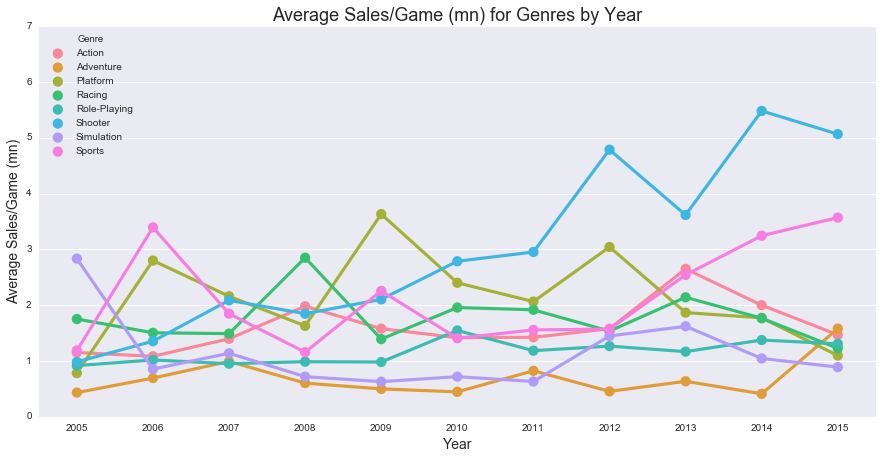

In [6]:
vg = pd.read_csv('vgsales.csv')
vg = vg[vg['Year'].notnull()]
vg['Year'] = vg['Year'].astype(int)
vg['Year'] = pd.to_datetime(vg['Year'], format='%Y').dt.year
def platform_bin(platform):
    return_value=""
    if platform == "DS":
        return_value="Nintendo"
    if platform == "PS3":
        return_value="Sony"
    if platform == "Wii":
        return_value="Nintendo"
    if platform == "X360":
        return_value="Microsoft"
    if platform == "PSP":
        return_value="Sony"
    if platform == "PC":
        return_value="PC"
    if platform == "PS2":
        return_value="Sony"
    if platform == "3DS":
        return_value="Nintendo"
    if platform == "PSV":
        return_value="Sony"
    if platform == "PS4":
        return_value="Sony"
    if platform == "XOne":
        return_value="Microsoft"
    if platform == "WiiU":
        return_value="Nintendo"
    if platform == "GBA":
        return_value="Nintendo"
    if platform == "XB":
        return_value="Microsoft"
    if platform == "GC":
        return_value="Nintendo"
    if platform == "DC":
        return_value="Sega"
    if platform == "PC":
        return_value="PC"
    return return_value

def handheld_bin(platform):
    return_value=""
    if platform == "DS":
        return_value="Yes"
    if platform == "PS3":
        return_value="No"
    if platform == "Wii":
        return_value="No"
    if platform == "X360":
        return_value="No"
    if platform == "PSP":
        return_value="Yes"
    if platform == "PC":
        return_value="No"
    if platform == "PS2":
        return_value="No"
    if platform == "3DS":
        return_value="Yes"
    if platform == "PSV":
        return_value="Yes"
    if platform == "PS4":
        return_value="No"
    if platform == "XOne":
        return_value="No"
    if platform == "WiiU":
        return_value="Yes"
    if platform == "GBA":
        return_value="Yes"
    if platform == "XB":
        return_value="No"
    if platform == "GC":
        return_value="No"
    if platform == "DC":
        return_value="No"
    return return_value

vg["Handheld"]=vg["Platform"].apply(lambda x: handheld_bin(x))
vg["Platform_CO"]=vg["Platform"].apply(lambda x: platform_bin(x))
vg = vg[(vg['Year']<2016) & (vg['Year']>=2005) & (vg['Platform_CO'] != 'Sega')]
vg['Platform'].value_counts()
#vg[vg['Year']>=2005]['Platform'].value_counts()
total = genre_l10['Global_Sales']
vg['tot_global_sales'] = total
vg = vg[(vg['tot_global_sales']>=.15) & (vg['Genre']!='Puzzle')]

#grouping every video game by name, genre, and year (last 10 years) and summing up all global sales
genre_l10 = vg.groupby(['Name','Genre','Year'])['Global_Sales'].sum().to_frame()
genre_l10.reset_index(inplace = True)
genre_l10

#grouping by genre and year, we can find total global sales and number of games

genre_trend = genre_l10.groupby(['Genre','Year'])['Global_Sales'].agg({sum,len})
genre_trend.reset_index(inplace = True)
genre_trend['avg'] = genre_trend['sum'] / genre_trend['len']

sub_genre = genre_trend[(genre_trend['Genre'] != 'Misc')&(genre_trend['Genre'] != 'Strategy')& (genre_trend['Genre'] != 'Fighting') ]
#sub_genre['Genre'].value_counts()
plt.subplots(figsize =(15,7))
sns.pointplot(data = sub_genre,x='Year',y='avg',hue='Genre',)
plt.title("Average Sales/Game (mn) for Genres by Year",fontsize = 18)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Average Sales/Game (mn)",fontsize = 14)
plt.ylim(0,7);